In [1]:
!python --version !pip show tensorflow

Python 3.11.11


In [2]:
!pip install tensorflow

In [3]:
# !pip install jupyter !jupyter notebook

ERROR: Invalid requirement: '!jupyter': Expected package name at the start of dependency specifier
    !jupyter
    ^


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


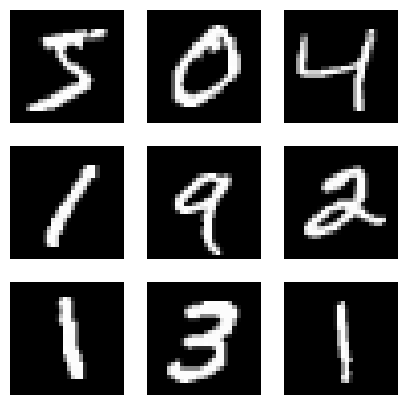

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data (scale pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Show sample images
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis('off')
plt.show()

In [7]:
# Define model architecture model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(input_shape=(28,28)), # Input layer (flatten 28x28 pixels) tf.keras.layers.Dense(128, activation='relu'), # Hidden layer tf.keras.layers.Dense(10, activation='softmax') # Output layer (10 classes) ]) # Compile model model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Train model model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test)) # Save trained model model.save("mnist_model.h5") print("Model training complete and saved as mnist_model.h5")

In [8]:
# Load trained model model = tf.keras.models.load_model("mnist_model.h5") # Convert to TensorFlow Lite converter = tf.lite.TFLiteConverter.from_keras_model(model) tflite_model = converter.convert() # Save the converted model with open("mnist_model.tflite", "wb") as f: f.write(tflite_model) print("Model successfully converted and saved as mnist_model.tflite")

In [13]:
# Load TensorFlow Lite model interpreter = tf.lite.Interpreter(model_path="mnist_model.tflite") interpreter.allocate_tensors() # Get input and output tensor details input_details = interpreter.get_input_details() output_details = interpreter.get_output_details() print("Input Details:", input_details) print("Output Details:", output_details)

In [14]:
# Select a test image test_image = x_test[0].astype(np.float32) # Ensure data type matches model input test_image = np.expand_dims(test_image, axis=0) # Reshape for model input # Set the input tensor interpreter.set_tensor(input_details[0]['index'], test_image) # Run inference interpreter.invoke() # Get the prediction output_data = interpreter.get_tensor(output_details[0]['index']) predicted_label = np.argmax(output_data) # Display the image and prediction plt.imshow(x_test[0], cmap="gray") plt.title(f"Predicted Label: {predicted_label}, Actual Label: {y_test[0]}") plt.show()